# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
env = UnityEnvironment(file_name='Reacher_Linux_20agents/Reacher.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from unityagents import UnityEnvironment
import ppo
import ppo_agent
import utils

In [2]:
env = UnityEnvironment(file_name="Reacher_Linux_20agents/Reacher.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
agent = ppo_agent.Agent(state_size=len(env_info.vector_observations[0]),
                        action_size=brain.vector_action_space_size,
                        hidden_sizes=[256, 512],
                        seed=237)

In [4]:
mean_rewards = []
ppo.train_ppo(env, agent, report_every=20, mean_rewards_per_episode=mean_rewards);

  0%|          | 20/5000 [02:43<11:17:01,  8.16s/it]

Episode: 20, score: 0.906000, window mean: 0.866000


  1%|          | 40/5000 [05:41<10:36:03,  7.69s/it]

Episode: 40, score: 1.156500, window mean: 0.975900


  1%|          | 60/5000 [08:14<10:24:42,  7.59s/it]

Episode: 60, score: 1.553500, window mean: 1.107850


  2%|▏         | 80/5000 [10:46<10:21:40,  7.58s/it]

Episode: 80, score: 1.583000, window mean: 1.172600


  2%|▏         | 100/5000 [13:18<10:25:47,  7.66s/it]

Episode: 100, score: 1.571000, window mean: 1.217800


  2%|▏         | 120/5000 [15:50<10:17:56,  7.60s/it]

Episode: 120, score: 0.957500, window mean: 1.259235


  3%|▎         | 140/5000 [18:21<10:11:49,  7.55s/it]

Episode: 140, score: 0.886500, window mean: 1.220510


  3%|▎         | 160/5000 [20:52<10:09:18,  7.55s/it]

Episode: 160, score: 1.094000, window mean: 1.140100


  4%|▎         | 180/5000 [23:25<10:16:33,  7.68s/it]

Episode: 180, score: 0.781000, window mean: 1.040165


  4%|▍         | 200/5000 [26:02<10:19:30,  7.74s/it]

Episode: 200, score: 0.790500, window mean: 0.915900


  4%|▍         | 220/5000 [28:33<10:01:57,  7.56s/it]

Episode: 220, score: 0.672000, window mean: 0.857465


  5%|▍         | 240/5000 [31:05<9:59:11,  7.55s/it] 

Episode: 240, score: 0.791000, window mean: 0.840535


  5%|▌         | 260/5000 [33:37<10:00:08,  7.60s/it]

Episode: 260, score: 0.843000, window mean: 0.814935


  6%|▌         | 280/5000 [36:09<9:53:30,  7.54s/it] 

Episode: 280, score: 1.037000, window mean: 0.832790


  6%|▌         | 300/5000 [38:40<9:49:27,  7.53s/it] 

Episode: 300, score: 0.972000, window mean: 0.865125


  6%|▋         | 320/5000 [41:12<9:50:27,  7.57s/it] 

Episode: 320, score: 0.934000, window mean: 0.891790


  7%|▋         | 340/5000 [44:01<11:58:50,  9.26s/it]

Episode: 340, score: 0.850500, window mean: 0.921760


  7%|▋         | 360/5000 [47:01<11:39:33,  9.05s/it]

Episode: 360, score: 1.124500, window mean: 0.946685


  8%|▊         | 380/5000 [49:56<11:00:38,  8.58s/it]

Episode: 380, score: 0.792500, window mean: 0.949220


  8%|▊         | 400/5000 [52:56<11:26:59,  8.96s/it]

Episode: 400, score: 0.980000, window mean: 0.945820


  8%|▊         | 420/5000 [55:55<11:59:41,  9.43s/it]

Episode: 420, score: 0.655500, window mean: 0.929160


  9%|▉         | 440/5000 [58:33<10:37:40,  8.39s/it]

Episode: 440, score: 0.773000, window mean: 0.897955


  9%|▉         | 460/5000 [1:01:17<10:17:14,  8.16s/it]

Episode: 460, score: 0.613000, window mean: 0.856150


 10%|▉         | 480/5000 [1:04:04<10:36:31,  8.45s/it]

Episode: 480, score: 0.654500, window mean: 0.815765


 10%|█         | 500/5000 [1:07:02<10:43:35,  8.58s/it]

Episode: 500, score: 0.920000, window mean: 0.794950


 10%|█         | 520/5000 [1:09:51<12:08:18,  9.75s/it]

Episode: 520, score: 0.943500, window mean: 0.793495


 11%|█         | 540/5000 [1:12:50<11:16:37,  9.10s/it]

Episode: 540, score: 0.937000, window mean: 0.837910


 11%|█         | 560/5000 [1:15:33<9:50:16,  7.98s/it] 

Episode: 560, score: 0.945500, window mean: 0.879220


 12%|█▏        | 580/5000 [1:18:05<9:17:55,  7.57s/it]

Episode: 580, score: 0.888500, window mean: 0.922980


 12%|█▏        | 600/5000 [1:20:36<9:13:42,  7.55s/it]

Episode: 600, score: 0.989000, window mean: 0.981950


 12%|█▏        | 620/5000 [1:23:07<9:09:51,  7.53s/it]

Episode: 620, score: 1.214500, window mean: 1.036365


 13%|█▎        | 640/5000 [1:25:44<9:36:53,  7.94s/it] 

Episode: 640, score: 1.049500, window mean: 1.034955


 13%|█▎        | 660/5000 [1:28:14<9:02:56,  7.51s/it]

Episode: 660, score: 0.858000, window mean: 1.047175


 14%|█▎        | 680/5000 [1:30:45<9:03:08,  7.54s/it]

Episode: 680, score: 1.021500, window mean: 1.056170


 14%|█▍        | 700/5000 [1:33:17<9:07:39,  7.64s/it]

Episode: 700, score: 1.269000, window mean: 1.053310


 14%|█▍        | 720/5000 [1:35:48<8:58:55,  7.56s/it]

Episode: 720, score: 0.862000, window mean: 1.034265


 15%|█▍        | 740/5000 [1:38:19<8:56:50,  7.56s/it]

Episode: 740, score: 1.099500, window mean: 1.036800


 15%|█▌        | 760/5000 [1:40:50<8:51:08,  7.52s/it]

Episode: 760, score: 1.013000, window mean: 1.066475


 16%|█▌        | 780/5000 [1:43:22<8:58:41,  7.66s/it]

Episode: 780, score: 1.051000, window mean: 1.082785


 16%|█▌        | 800/5000 [1:45:53<8:47:01,  7.53s/it]

Episode: 800, score: 1.228500, window mean: 1.098765


 16%|█▋        | 820/5000 [1:48:24<8:44:41,  7.53s/it]

Episode: 820, score: 1.067000, window mean: 1.137430


 17%|█▋        | 840/5000 [1:50:54<8:41:19,  7.52s/it]

Episode: 840, score: 1.528000, window mean: 1.161345


 17%|█▋        | 860/5000 [1:53:30<9:21:23,  8.14s/it]

Episode: 860, score: 1.213000, window mean: 1.171275


 18%|█▊        | 880/5000 [1:56:10<8:44:11,  7.63s/it] 

Episode: 880, score: 1.369500, window mean: 1.195015


 18%|█▊        | 900/5000 [1:58:41<8:33:28,  7.51s/it]

Episode: 900, score: 1.333500, window mean: 1.186985


 18%|█▊        | 920/5000 [2:01:12<8:32:24,  7.54s/it]

Episode: 920, score: 1.013500, window mean: 1.183225


 19%|█▉        | 940/5000 [2:03:43<8:30:01,  7.54s/it]

Episode: 940, score: 1.354500, window mean: 1.183395


 19%|█▉        | 960/5000 [2:06:17<8:32:01,  7.60s/it]

Episode: 960, score: 1.184500, window mean: 1.171355


 20%|█▉        | 980/5000 [2:08:49<8:24:38,  7.53s/it]

Episode: 980, score: 1.181000, window mean: 1.146125


 20%|██        | 1000/5000 [2:11:21<8:29:36,  7.64s/it]

Episode: 1000, score: 0.967500, window mean: 1.136290


 20%|██        | 1020/5000 [2:13:50<8:16:42,  7.49s/it]

Episode: 1020, score: 1.000500, window mean: 1.125940


 21%|██        | 1040/5000 [2:16:21<8:16:21,  7.52s/it]

Episode: 1040, score: 0.971500, window mean: 1.134880


 21%|██        | 1060/5000 [2:18:51<8:11:43,  7.49s/it]

Episode: 1060, score: 0.937000, window mean: 1.153840


 22%|██▏       | 1080/5000 [2:21:23<8:17:21,  7.61s/it]

Episode: 1080, score: 1.152500, window mean: 1.166360


 22%|██▏       | 1100/5000 [2:23:53<8:09:40,  7.53s/it]

Episode: 1100, score: 1.263000, window mean: 1.166950


 22%|██▏       | 1120/5000 [2:26:29<8:08:33,  7.55s/it]

Episode: 1120, score: 0.837500, window mean: 1.165740


 23%|██▎       | 1140/5000 [2:28:59<8:01:29,  7.48s/it]

Episode: 1140, score: 1.058000, window mean: 1.141160


 23%|██▎       | 1160/5000 [2:31:30<8:05:12,  7.58s/it]

Episode: 1160, score: 1.150500, window mean: 1.102170


 24%|██▎       | 1180/5000 [2:34:01<7:58:44,  7.52s/it]

Episode: 1180, score: 1.167000, window mean: 1.092315


 24%|██▍       | 1200/5000 [2:36:32<7:56:55,  7.53s/it]

Episode: 1200, score: 1.005000, window mean: 1.101995


 24%|██▍       | 1220/5000 [2:39:02<7:52:22,  7.50s/it]

Episode: 1220, score: 1.048500, window mean: 1.096955


 25%|██▍       | 1240/5000 [2:41:33<7:55:19,  7.58s/it]

Episode: 1240, score: 1.015500, window mean: 1.079195


 25%|██▌       | 1260/5000 [2:44:04<7:47:38,  7.50s/it]

Episode: 1260, score: 0.889500, window mean: 1.061290


 26%|██▌       | 1280/5000 [2:46:34<7:45:26,  7.51s/it]

Episode: 1280, score: 1.102000, window mean: 1.028100


 26%|██▌       | 1300/5000 [2:49:05<7:42:32,  7.50s/it]

Episode: 1300, score: 0.956000, window mean: 0.981075


 26%|██▋       | 1320/5000 [2:51:35<7:43:22,  7.56s/it]

Episode: 1320, score: 0.888000, window mean: 0.956810


 27%|██▋       | 1340/5000 [2:54:06<7:41:02,  7.56s/it]

Episode: 1340, score: 0.842500, window mean: 0.948290


 27%|██▋       | 1360/5000 [2:56:42<7:36:01,  7.52s/it]

Episode: 1360, score: 1.123500, window mean: 0.971100


 28%|██▊       | 1380/5000 [2:59:13<7:32:27,  7.50s/it]

Episode: 1380, score: 1.380500, window mean: 1.014210


 28%|██▊       | 1400/5000 [3:01:44<7:33:29,  7.56s/it]

Episode: 1400, score: 1.228500, window mean: 1.091530


 28%|██▊       | 1420/5000 [3:04:15<7:28:37,  7.52s/it]

Episode: 1420, score: 1.298500, window mean: 1.157320


 29%|██▉       | 1440/5000 [3:06:48<7:27:34,  7.54s/it]

Episode: 1440, score: 1.539000, window mean: 1.240420


 29%|██▉       | 1460/5000 [3:09:19<7:30:55,  7.64s/it]

Episode: 1460, score: 1.446000, window mean: 1.296565


 30%|██▉       | 1480/5000 [3:11:50<7:23:42,  7.56s/it]

Episode: 1480, score: 1.298000, window mean: 1.348405


 30%|███       | 1500/5000 [3:14:22<7:17:23,  7.50s/it]

Episode: 1500, score: 1.567500, window mean: 1.390585


 30%|███       | 1520/5000 [3:16:52<7:15:15,  7.50s/it]

Episode: 1520, score: 1.485500, window mean: 1.435305


 31%|███       | 1540/5000 [3:19:23<7:19:11,  7.62s/it]

Episode: 1540, score: 1.494000, window mean: 1.467230


 31%|███       | 1560/5000 [3:21:54<7:11:30,  7.53s/it]

Episode: 1560, score: 1.200500, window mean: 1.492105


 32%|███▏      | 1580/5000 [3:24:24<7:07:45,  7.50s/it]

Episode: 1580, score: 1.327500, window mean: 1.486350


 32%|███▏      | 1600/5000 [3:27:00<7:04:57,  7.50s/it]

Episode: 1600, score: 1.548000, window mean: 1.482835


 32%|███▏      | 1620/5000 [3:29:31<7:08:59,  7.62s/it]

Episode: 1620, score: 1.592500, window mean: 1.471385


 33%|███▎      | 1640/5000 [3:32:02<7:00:21,  7.51s/it]

Episode: 1640, score: 1.431000, window mean: 1.463290


 33%|███▎      | 1660/5000 [3:34:32<6:57:22,  7.50s/it]

Episode: 1660, score: 1.379000, window mean: 1.469795


 34%|███▎      | 1680/5000 [3:37:03<6:57:00,  7.54s/it]

Episode: 1680, score: 1.404500, window mean: 1.478870


 34%|███▍      | 1700/5000 [3:39:35<6:56:48,  7.58s/it]

Episode: 1700, score: 1.532500, window mean: 1.473570


 34%|███▍      | 1720/5000 [3:42:05<6:49:59,  7.50s/it]

Episode: 1720, score: 1.512000, window mean: 1.487390


 35%|███▍      | 1740/5000 [3:44:36<6:47:16,  7.50s/it]

Episode: 1740, score: 1.487500, window mean: 1.457860


 35%|███▌      | 1760/5000 [3:47:06<6:44:30,  7.49s/it]

Episode: 1760, score: 1.525000, window mean: 1.440170


 36%|███▌      | 1780/5000 [3:49:37<6:46:26,  7.57s/it]

Episode: 1780, score: 1.384500, window mean: 1.419975


 36%|███▌      | 1800/5000 [3:52:07<6:39:38,  7.49s/it]

Episode: 1800, score: 1.149000, window mean: 1.399940


 36%|███▋      | 1820/5000 [3:54:37<6:36:05,  7.47s/it]

Episode: 1820, score: 0.914000, window mean: 1.354115


 37%|███▋      | 1840/5000 [3:57:13<6:35:43,  7.51s/it]

Episode: 1840, score: 1.587500, window mean: 1.362690


 37%|███▋      | 1860/5000 [3:59:44<6:36:22,  7.57s/it]

Episode: 1860, score: 1.454500, window mean: 1.341345


 38%|███▊      | 1880/5000 [4:02:14<6:29:50,  7.50s/it]

Episode: 1880, score: 1.251500, window mean: 1.344085


 38%|███▊      | 1900/5000 [4:04:45<6:26:46,  7.49s/it]

Episode: 1900, score: 1.562500, window mean: 1.332950


 38%|███▊      | 1920/5000 [4:07:15<6:27:36,  7.55s/it]

Episode: 1920, score: 1.366000, window mean: 1.331885


 39%|███▉      | 1940/5000 [4:09:45<6:23:05,  7.51s/it]

Episode: 1940, score: 1.203000, window mean: 1.305320


 39%|███▉      | 1960/5000 [4:12:16<6:22:05,  7.54s/it]

Episode: 1960, score: 1.196000, window mean: 1.299035


 40%|███▉      | 1980/5000 [4:14:46<6:16:59,  7.49s/it]

Episode: 1980, score: 1.038000, window mean: 1.271740


 40%|████      | 2000/5000 [4:17:18<6:41:16,  8.03s/it]

Episode: 2000, score: 1.567000, window mean: 1.289740


 40%|████      | 2020/5000 [4:19:52<6:12:11,  7.49s/it]

Episode: 2020, score: 2.038000, window mean: 1.323870


 41%|████      | 2040/5000 [4:22:22<6:10:34,  7.51s/it]

Episode: 2040, score: 1.479000, window mean: 1.350860


 41%|████      | 2060/5000 [4:24:52<6:06:25,  7.48s/it]

Episode: 2060, score: 0.924000, window mean: 1.357330


 42%|████▏     | 2080/5000 [4:27:28<6:07:11,  7.54s/it]

Episode: 2080, score: 1.257500, window mean: 1.359835


 42%|████▏     | 2100/5000 [4:29:58<6:01:52,  7.49s/it]

Episode: 2100, score: 1.176500, window mean: 1.298805


 42%|████▏     | 2120/5000 [4:32:29<5:59:51,  7.50s/it]

Episode: 2120, score: 1.063500, window mean: 1.226005


 43%|████▎     | 2140/5000 [4:34:59<5:56:04,  7.47s/it]

Episode: 2140, score: 1.090000, window mean: 1.181760


 43%|████▎     | 2160/5000 [4:37:30<5:57:12,  7.55s/it]

Episode: 2160, score: 1.600000, window mean: 1.140820


 44%|████▎     | 2180/5000 [4:40:00<5:51:17,  7.47s/it]

Episode: 2180, score: 1.319000, window mean: 1.145735


 44%|████▍     | 2200/5000 [4:42:30<5:49:00,  7.48s/it]

Episode: 2200, score: 1.058500, window mean: 1.184575


 44%|████▍     | 2220/5000 [4:45:00<5:45:48,  7.46s/it]

Episode: 2220, score: 1.799000, window mean: 1.235160


 45%|████▍     | 2240/5000 [4:47:31<5:46:49,  7.54s/it]

Episode: 2240, score: 1.400000, window mean: 1.274745


 45%|████▌     | 2260/5000 [4:50:01<5:42:57,  7.51s/it]

Episode: 2260, score: 1.675000, window mean: 1.347535


 46%|████▌     | 2280/5000 [4:52:31<5:39:22,  7.49s/it]

Episode: 2280, score: 2.095000, window mean: 1.448720


 46%|████▌     | 2300/5000 [4:55:03<6:04:30,  8.10s/it]

Episode: 2300, score: 1.585000, window mean: 1.506525


 46%|████▋     | 2320/5000 [4:57:37<5:38:03,  7.57s/it]

Episode: 2320, score: 1.633000, window mean: 1.539540


 47%|████▋     | 2340/5000 [5:00:08<5:37:03,  7.60s/it]

Episode: 2340, score: 1.770500, window mean: 1.578295


 47%|████▋     | 2360/5000 [5:02:38<5:29:05,  7.48s/it]

Episode: 2360, score: 1.311000, window mean: 1.601530


 48%|████▊     | 2380/5000 [5:05:08<5:25:35,  7.46s/it]

Episode: 2380, score: 0.768000, window mean: 1.576315


 48%|████▊     | 2400/5000 [5:07:39<5:26:52,  7.54s/it]

Episode: 2400, score: 2.556500, window mean: 1.615785


 48%|████▊     | 2420/5000 [5:10:09<5:22:29,  7.50s/it]

Episode: 2420, score: 1.607000, window mean: 1.644905


 49%|████▉     | 2440/5000 [5:12:40<5:19:19,  7.48s/it]

Episode: 2440, score: 1.622000, window mean: 1.653755


 49%|████▉     | 2460/5000 [5:15:10<5:18:35,  7.53s/it]

Episode: 2460, score: 1.647000, window mean: 1.672815


 50%|████▉     | 2480/5000 [5:17:41<5:17:03,  7.55s/it]

Episode: 2480, score: 1.734500, window mean: 1.692495


 50%|█████     | 2500/5000 [5:20:12<5:14:18,  7.54s/it]

Episode: 2500, score: 1.653500, window mean: 1.688470


 50%|█████     | 2520/5000 [5:22:42<5:09:03,  7.48s/it]

Episode: 2520, score: 1.372000, window mean: 1.677620


 51%|█████     | 2540/5000 [5:25:18<5:56:20,  8.69s/it]

Episode: 2540, score: 1.634500, window mean: 1.634025


 51%|█████     | 2560/5000 [5:27:48<5:07:07,  7.55s/it]

Episode: 2560, score: 1.475500, window mean: 1.572490


 52%|█████▏    | 2580/5000 [5:30:19<5:03:50,  7.53s/it]

Episode: 2580, score: 1.346000, window mean: 1.484140


 52%|█████▏    | 2600/5000 [5:32:49<4:59:12,  7.48s/it]

Episode: 2600, score: 1.206000, window mean: 1.389230


 52%|█████▏    | 2620/5000 [5:35:20<5:03:17,  7.65s/it]

Episode: 2620, score: 0.907500, window mean: 1.343870


 53%|█████▎    | 2640/5000 [5:37:51<4:57:07,  7.55s/it]

Episode: 2640, score: 1.587000, window mean: 1.321035


 53%|█████▎    | 2660/5000 [5:40:21<4:52:06,  7.49s/it]

Episode: 2660, score: 1.555500, window mean: 1.301835


 54%|█████▎    | 2680/5000 [5:42:52<4:49:54,  7.50s/it]

Episode: 2680, score: 1.626000, window mean: 1.304920


 54%|█████▍    | 2700/5000 [5:45:23<4:52:12,  7.62s/it]

Episode: 2700, score: 2.040000, window mean: 1.331915


 54%|█████▍    | 2720/5000 [5:47:52<4:45:17,  7.51s/it]

Episode: 2720, score: 1.450500, window mean: 1.295935


 55%|█████▍    | 2740/5000 [5:50:23<4:42:05,  7.49s/it]

Episode: 2740, score: 1.058000, window mean: 1.325955


 55%|█████▌    | 2760/5000 [5:52:53<4:40:22,  7.51s/it]

Episode: 2760, score: 1.850500, window mean: 1.357905


 56%|█████▌    | 2780/5000 [5:55:30<5:07:03,  8.30s/it]

Episode: 2780, score: 1.320000, window mean: 1.370715


 56%|█████▌    | 2800/5000 [5:58:00<4:35:27,  7.51s/it]

Episode: 2800, score: 1.602500, window mean: 1.369760


 56%|█████▋    | 2820/5000 [6:00:31<4:34:27,  7.55s/it]

Episode: 2820, score: 0.993500, window mean: 1.374295


 57%|█████▋    | 2840/5000 [6:03:01<4:29:31,  7.49s/it]

Episode: 2840, score: 1.253500, window mean: 1.364910


 57%|█████▋    | 2860/5000 [6:05:32<4:30:42,  7.59s/it]

Episode: 2860, score: 2.024500, window mean: 1.368480


 58%|█████▊    | 2880/5000 [6:08:03<4:25:23,  7.51s/it]

Episode: 2880, score: 1.831000, window mean: 1.380705


 58%|█████▊    | 2900/5000 [6:10:33<4:22:21,  7.50s/it]

Episode: 2900, score: 2.053000, window mean: 1.384915


 58%|█████▊    | 2920/5000 [6:13:03<4:20:09,  7.50s/it]

Episode: 2920, score: 0.723500, window mean: 1.424680


 59%|█████▉    | 2940/5000 [6:15:34<4:21:36,  7.62s/it]

Episode: 2940, score: 1.721000, window mean: 1.435865


 59%|█████▉    | 2960/5000 [6:18:04<4:13:59,  7.47s/it]

Episode: 2960, score: 1.221500, window mean: 1.395135


 60%|█████▉    | 2980/5000 [6:20:34<4:12:12,  7.49s/it]

Episode: 2980, score: 1.774000, window mean: 1.372305


 60%|██████    | 3000/5000 [6:23:04<4:10:27,  7.51s/it]

Episode: 3000, score: 1.285000, window mean: 1.369865


 60%|██████    | 3020/5000 [6:25:40<4:22:19,  7.95s/it]

Episode: 3020, score: 1.151500, window mean: 1.343175


 61%|██████    | 3040/5000 [6:28:11<4:06:46,  7.55s/it]

Episode: 3040, score: 1.234000, window mean: 1.317460


 61%|██████    | 3060/5000 [6:30:42<4:02:13,  7.49s/it]

Episode: 3060, score: 1.409500, window mean: 1.329280


 62%|██████▏   | 3080/5000 [6:33:13<4:00:41,  7.52s/it]

Episode: 3080, score: 1.329000, window mean: 1.306480


 62%|██████▏   | 3100/5000 [6:35:44<3:59:23,  7.56s/it]

Episode: 3100, score: 1.474000, window mean: 1.308515


 62%|██████▏   | 3120/5000 [6:38:14<3:54:43,  7.49s/it]

Episode: 3120, score: 0.924500, window mean: 1.339475


 63%|██████▎   | 3140/5000 [6:40:45<3:52:54,  7.51s/it]

Episode: 3140, score: 1.486000, window mean: 1.346050


 63%|██████▎   | 3160/5000 [6:43:16<3:54:48,  7.66s/it]

Episode: 3160, score: 0.879500, window mean: 1.338660


 64%|██████▎   | 3180/5000 [6:45:46<3:47:41,  7.51s/it]

Episode: 3180, score: 1.313000, window mean: 1.371575


 64%|██████▍   | 3200/5000 [6:48:17<3:45:20,  7.51s/it]

Episode: 3200, score: 1.668500, window mean: 1.355035


 64%|██████▍   | 3220/5000 [6:50:47<3:42:24,  7.50s/it]

Episode: 3220, score: 1.113000, window mean: 1.349290


 65%|██████▍   | 3240/5000 [6:53:18<3:43:58,  7.64s/it]

Episode: 3240, score: 1.469000, window mean: 1.383555


 65%|██████▌   | 3260/5000 [6:55:54<3:45:03,  7.76s/it]

Episode: 3260, score: 2.379500, window mean: 1.431585


 66%|██████▌   | 3280/5000 [6:58:24<3:35:15,  7.51s/it]

Episode: 3280, score: 1.479000, window mean: 1.483005


 66%|██████▌   | 3300/5000 [7:00:54<3:32:44,  7.51s/it]

Episode: 3300, score: 2.210000, window mean: 1.564725


 66%|██████▋   | 3320/5000 [7:03:26<3:32:41,  7.60s/it]

Episode: 3320, score: 1.501000, window mean: 1.614850


 67%|██████▋   | 3340/5000 [7:05:57<3:28:46,  7.55s/it]

Episode: 3340, score: 1.497000, window mean: 1.652180


 67%|██████▋   | 3360/5000 [7:08:28<3:25:23,  7.51s/it]

Episode: 3360, score: 1.384500, window mean: 1.641185


 68%|██████▊   | 3380/5000 [7:10:58<3:22:17,  7.49s/it]

Episode: 3380, score: 1.529500, window mean: 1.615880


 68%|██████▊   | 3400/5000 [7:13:29<3:22:11,  7.58s/it]

Episode: 3400, score: 1.688000, window mean: 1.586905


 68%|██████▊   | 3420/5000 [7:15:59<3:18:08,  7.52s/it]

Episode: 3420, score: 1.368000, window mean: 1.590625


 69%|██████▉   | 3440/5000 [7:18:30<3:15:29,  7.52s/it]

Episode: 3440, score: 1.667000, window mean: 1.599520


 69%|██████▉   | 3460/5000 [7:21:00<3:12:04,  7.48s/it]

Episode: 3460, score: 1.981500, window mean: 1.641645


 70%|██████▉   | 3480/5000 [7:23:31<3:12:14,  7.59s/it]

Episode: 3480, score: 1.341000, window mean: 1.662480


 70%|███████   | 3500/5000 [7:26:07<3:11:38,  7.67s/it]

Episode: 3500, score: 1.330000, window mean: 1.668590


 70%|███████   | 3520/5000 [7:28:37<3:05:09,  7.51s/it]

Episode: 3520, score: 1.193500, window mean: 1.648560


 71%|███████   | 3540/5000 [7:31:08<3:01:45,  7.47s/it]

Episode: 3540, score: 1.679500, window mean: 1.630800


 71%|███████   | 3560/5000 [7:33:38<3:00:55,  7.54s/it]

Episode: 3560, score: 1.646500, window mean: 1.597420


 72%|███████▏  | 3580/5000 [7:36:09<2:57:30,  7.50s/it]

Episode: 3580, score: 1.387500, window mean: 1.583185


 72%|███████▏  | 3600/5000 [7:38:39<2:54:35,  7.48s/it]

Episode: 3600, score: 1.433500, window mean: 1.568645


 72%|███████▏  | 3620/5000 [7:41:10<2:51:58,  7.48s/it]

Episode: 3620, score: 1.817500, window mean: 1.557660


 73%|███████▎  | 3640/5000 [7:43:40<2:50:12,  7.51s/it]

Episode: 3640, score: 1.284000, window mean: 1.515715


 73%|███████▎  | 3660/5000 [7:46:10<2:48:01,  7.52s/it]

Episode: 3660, score: 2.018000, window mean: 1.518305


 74%|███████▎  | 3680/5000 [7:48:40<2:44:06,  7.46s/it]

Episode: 3680, score: 1.511500, window mean: 1.465105


 74%|███████▍  | 3700/5000 [7:51:10<2:42:36,  7.51s/it]

Episode: 3700, score: 1.103000, window mean: 1.431065


 74%|███████▍  | 3720/5000 [7:53:41<2:40:33,  7.53s/it]

Episode: 3720, score: 1.698500, window mean: 1.436785


 75%|███████▍  | 3740/5000 [7:56:16<2:39:58,  7.62s/it]

Episode: 3740, score: 1.564500, window mean: 1.439210


 75%|███████▌  | 3760/5000 [7:58:47<2:34:46,  7.49s/it]

Episode: 3760, score: 1.810500, window mean: 1.440450


 76%|███████▌  | 3780/5000 [8:01:17<2:33:43,  7.56s/it]

Episode: 3780, score: 2.083500, window mean: 1.491640


 76%|███████▌  | 3800/5000 [8:03:47<2:30:09,  7.51s/it]

Episode: 3800, score: 1.688000, window mean: 1.544305


 76%|███████▋  | 3820/5000 [8:06:17<2:27:21,  7.49s/it]

Episode: 3820, score: 1.145500, window mean: 1.571740


 77%|███████▋  | 3840/5000 [8:08:47<2:24:32,  7.48s/it]

Episode: 3840, score: 1.407000, window mean: 1.632620


 77%|███████▋  | 3860/5000 [8:11:18<2:25:36,  7.66s/it]

Episode: 3860, score: 1.516500, window mean: 1.659215


 78%|███████▊  | 3880/5000 [8:13:49<2:20:31,  7.53s/it]

Episode: 3880, score: 2.050500, window mean: 1.695790


 78%|███████▊  | 3900/5000 [8:16:19<2:18:08,  7.53s/it]

Episode: 3900, score: 1.495000, window mean: 1.688305


 78%|███████▊  | 3920/5000 [8:18:49<2:15:26,  7.52s/it]

Episode: 3920, score: 1.939000, window mean: 1.675565


 79%|███████▉  | 3940/5000 [8:21:20<2:14:38,  7.62s/it]

Episode: 3940, score: 1.362000, window mean: 1.683310


 79%|███████▉  | 3960/5000 [8:23:50<2:10:37,  7.54s/it]

Episode: 3960, score: 1.512000, window mean: 1.684770


 80%|███████▉  | 3980/5000 [8:26:26<2:08:46,  7.57s/it]

Episode: 3980, score: 1.858500, window mean: 1.697155


 80%|████████  | 4000/5000 [8:28:56<2:04:30,  7.47s/it]

Episode: 4000, score: 2.102000, window mean: 1.738275


 80%|████████  | 4020/5000 [8:31:27<2:03:39,  7.57s/it]

Episode: 4020, score: 1.806000, window mean: 1.766490


 81%|████████  | 4040/5000 [8:33:58<2:00:46,  7.55s/it]

Episode: 4040, score: 1.430000, window mean: 1.813240


 81%|████████  | 4060/5000 [8:36:29<1:57:47,  7.52s/it]

Episode: 4060, score: 2.132000, window mean: 1.875950


 82%|████████▏ | 4080/5000 [8:38:59<1:55:09,  7.51s/it]

Episode: 4080, score: 2.226500, window mean: 1.910380


 82%|████████▏ | 4100/5000 [8:41:30<1:53:22,  7.56s/it]

Episode: 4100, score: 1.864500, window mean: 1.928655


 82%|████████▏ | 4120/5000 [8:44:00<1:50:30,  7.53s/it]

Episode: 4120, score: 1.895000, window mean: 1.918725


 83%|████████▎ | 4140/5000 [8:46:30<1:47:12,  7.48s/it]

Episode: 4140, score: 1.682000, window mean: 1.852225


 83%|████████▎ | 4160/5000 [8:49:01<1:45:22,  7.53s/it]

Episode: 4160, score: 1.581000, window mean: 1.797320


 84%|████████▎ | 4180/5000 [8:51:32<1:43:19,  7.56s/it]

Episode: 4180, score: 1.696500, window mean: 1.726295


 84%|████████▍ | 4200/5000 [8:54:03<1:40:17,  7.52s/it]

Episode: 4200, score: 1.783000, window mean: 1.678850


 84%|████████▍ | 4220/5000 [8:56:39<1:37:56,  7.53s/it]

Episode: 4220, score: 1.557500, window mean: 1.658715


 85%|████████▍ | 4240/5000 [8:59:09<1:34:49,  7.49s/it]

Episode: 4240, score: 1.242500, window mean: 1.644540


 85%|████████▌ | 4260/5000 [9:01:41<1:33:17,  7.56s/it]

Episode: 4260, score: 0.890500, window mean: 1.618785


 86%|████████▌ | 4280/5000 [9:04:11<1:30:06,  7.51s/it]

Episode: 4280, score: 1.514000, window mean: 1.611725


 86%|████████▌ | 4300/5000 [9:06:42<1:27:28,  7.50s/it]

Episode: 4300, score: 2.198500, window mean: 1.568955


 86%|████████▋ | 4320/5000 [9:09:13<1:24:41,  7.47s/it]

Episode: 4320, score: 1.516000, window mean: 1.565225


 87%|████████▋ | 4340/5000 [9:11:43<1:23:04,  7.55s/it]

Episode: 4340, score: 1.825500, window mean: 1.544155


 87%|████████▋ | 4360/5000 [9:14:14<1:20:12,  7.52s/it]

Episode: 4360, score: 1.513000, window mean: 1.519785


 88%|████████▊ | 4380/5000 [9:16:45<1:17:42,  7.52s/it]

Episode: 4380, score: 1.515500, window mean: 1.540485


 88%|████████▊ | 4400/5000 [9:19:16<1:15:44,  7.57s/it]

Episode: 4400, score: 1.529000, window mean: 1.548880


 88%|████████▊ | 4420/5000 [9:21:46<1:12:33,  7.51s/it]

Episode: 4420, score: 1.605500, window mean: 1.540590


 89%|████████▉ | 4440/5000 [9:24:16<1:10:03,  7.51s/it]

Episode: 4440, score: 1.347500, window mean: 1.544315


 89%|████████▉ | 4460/5000 [9:26:52<1:07:36,  7.51s/it]

Episode: 4460, score: 1.722500, window mean: 1.561070


 90%|████████▉ | 4480/5000 [9:29:22<1:05:44,  7.59s/it]

Episode: 4480, score: 1.653000, window mean: 1.524005


 90%|█████████ | 4500/5000 [9:31:53<1:02:29,  7.50s/it]

Episode: 4500, score: 1.461500, window mean: 1.518840


 90%|█████████ | 4520/5000 [9:34:23<59:49,  7.48s/it]  

Episode: 4520, score: 1.819500, window mean: 1.505340


 91%|█████████ | 4540/5000 [9:36:55<58:02,  7.57s/it]  

Episode: 4540, score: 1.287500, window mean: 1.505165


 91%|█████████ | 4560/5000 [9:39:26<55:38,  7.59s/it]

Episode: 4560, score: 1.736500, window mean: 1.507830


 92%|█████████▏| 4580/5000 [9:41:56<52:33,  7.51s/it]

Episode: 4580, score: 1.257500, window mean: 1.502275


 92%|█████████▏| 4600/5000 [9:44:27<49:57,  7.49s/it]

Episode: 4600, score: 1.317000, window mean: 1.508190


 92%|█████████▏| 4620/5000 [9:46:57<47:25,  7.49s/it]

Episode: 4620, score: 1.737000, window mean: 1.528550


 93%|█████████▎| 4640/5000 [9:49:28<45:29,  7.58s/it]

Episode: 4640, score: 1.428500, window mean: 1.533490


 93%|█████████▎| 4660/5000 [9:51:58<42:32,  7.51s/it]

Episode: 4660, score: 1.956500, window mean: 1.527685


 94%|█████████▎| 4680/5000 [9:54:28<40:04,  7.52s/it]

Episode: 4680, score: 1.265500, window mean: 1.542200


 94%|█████████▍| 4700/5000 [9:57:04<37:28,  7.50s/it]

Episode: 4700, score: 1.412500, window mean: 1.552430


 94%|█████████▍| 4720/5000 [9:59:35<35:20,  7.57s/it]

Episode: 4720, score: 1.844500, window mean: 1.519540


 95%|█████████▍| 4740/5000 [10:02:06<32:35,  7.52s/it]

Episode: 4740, score: 1.571000, window mean: 1.505795


 95%|█████████▌| 4760/5000 [10:04:36<30:01,  7.51s/it]

Episode: 4760, score: 1.894000, window mean: 1.512795


 96%|█████████▌| 4780/5000 [10:07:06<27:23,  7.47s/it]

Episode: 4780, score: 1.622000, window mean: 1.498885


 96%|█████████▌| 4800/5000 [10:09:37<25:13,  7.57s/it]

Episode: 4800, score: 1.787000, window mean: 1.506120


 96%|█████████▋| 4820/5000 [10:12:08<22:33,  7.52s/it]

Episode: 4820, score: 1.862000, window mean: 1.562250


 97%|█████████▋| 4840/5000 [10:14:38<20:03,  7.52s/it]

Episode: 4840, score: 1.912500, window mean: 1.614980


 97%|█████████▋| 4860/5000 [10:17:09<17:32,  7.52s/it]

Episode: 4860, score: 1.902500, window mean: 1.672970


 98%|█████████▊| 4880/5000 [10:19:39<14:59,  7.50s/it]

Episode: 4880, score: 1.562500, window mean: 1.733695


 98%|█████████▊| 4900/5000 [10:22:10<12:31,  7.51s/it]

Episode: 4900, score: 2.116500, window mean: 1.756410


 98%|█████████▊| 4920/5000 [10:24:40<10:00,  7.51s/it]

Episode: 4920, score: 1.236000, window mean: 1.760455


 99%|█████████▉| 4940/5000 [10:27:16<07:40,  7.68s/it]

Episode: 4940, score: 1.786500, window mean: 1.729075


 99%|█████████▉| 4960/5000 [10:29:47<05:02,  7.57s/it]

Episode: 4960, score: 1.289500, window mean: 1.719935


100%|█████████▉| 4980/5000 [10:32:17<02:29,  7.49s/it]

Episode: 4980, score: 1.674000, window mean: 1.732735


100%|██████████| 5000/5000 [10:34:48<00:00,  7.62s/it]

Episode: 5000, score: 2.116500, window mean: 1.754155


[0.7534999831579625,
 0.5224999883212149,
 0.7194999839179218,
 0.76649998286739,
 0.7449999833479524,
 0.9029999798163771,
 0.7194999839179218,
 1.0979999754577876,
 0.9364999790675939,
 0.7739999826997519,
 0.8989999799057842,
 0.7799999825656414,
 0.813499981816858,
 0.8024999820627272,
 0.8259999815374612,
 0.8779999803751707,
 1.1859999734908342,
 1.0964999754913152,
 1.1944999733008443,
 0.9059999797493219,
 1.1474999743513763,
 1.0934999755583703,
 1.0939999755471945,
 1.0129999773576857,
 1.1364999745972455,
 0.9059999797493219,
 1.1014999753795565,
 1.026999977044761,
 1.1814999735914171,
 1.1519999742507934,
 1.0394999767653643,
 1.080999975837767,
 0.9439999788999558,
 0.7294999836944044,
 1.0544999764300882,
 1.0354999768547715,
 1.1859999734908342,
 1.1239999748766423,
 1.5129999661818148,
 1.1564999741502107,
 1.111499975156039,
 1.2574999718926847,
 1.3294999702833592,
 1.3394999700598418,
 1.2129999728873373,
 1.5794999646954238,
 1.5134999661706388,
 1.1574999741278589

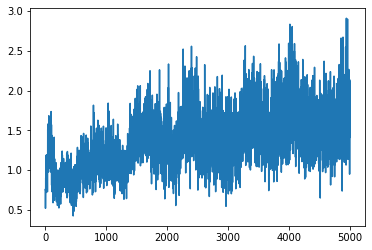

In [5]:
plt.plot(mean_rewards)

In [6]:
agent.save('checkpoint.pth')

In [7]:
with open('episode_rewards.txt', 'wt') as fp:
    fp.write('\n'.join(str(x) for x in mean_rewards) + '\n')